# 911 Calls practice


Data And Setup

In [1]:
import numpy as np
import pandas as pd

Importing the Visualization libraries


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Reading the csv file as a dataframe df. Data is returned as a dataframe

In [3]:
df = pd.read_csv('911.csv')

Checking the information of the df dataframe using info() function


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Check the head of df

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:40,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 17:40,NORRISTOWN,HAWS AVE,1


What are the top 5 zipcodes for 911 calls? 

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What are the top 5 townships (twp) for 911 calls?

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Take a look at the 'title' column, how many unique title codes are there? 

In [8]:
df['title'].nunique()

110

# Creating new features

In the title column, there are reasons behind the calling, specified at index 0. Making a new column reasons to note those reasons in another column

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

Most common reason for a 911 call based on this new column

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

create a countplot of 911 calls by Reason

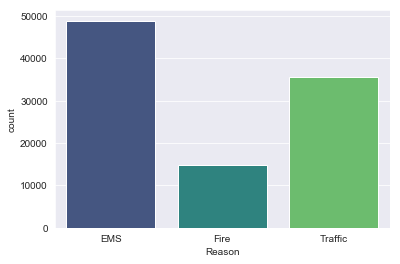

In [11]:
sns.countplot(x='Reason',data=df,palette='viridis')

Checking type of timestamp column

In [12]:
type(df['timeStamp'].iloc[0])

str

Converting str to datetime datatype

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Grabbing specific attributes from a Datetime object by calling them

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. *

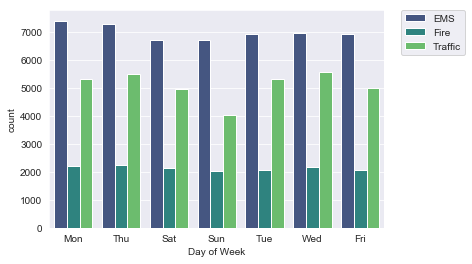

In [28]:
sns.countplot(x='Day of Week', data=df, hue='Reason',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

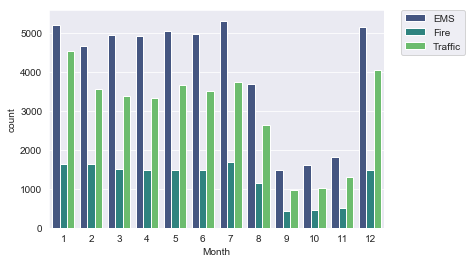

In [29]:
sns.countplot(x='Month', data=df, hue='Reason',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [30]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,11355,11355,11355,9893,11355,11355,11351,11257,11355,11355,11355,11355
2,9881,9881,9881,8559,9881,9881,9876,9827,9881,9881,9881,9881
3,9865,9865,9865,8678,9865,9865,9859,9834,9865,9865,9865,9865
4,9725,9725,9725,8523,9725,9725,9722,9689,9725,9725,9725,9725
5,10191,10191,10191,8856,10191,10191,10187,10136,10191,10191,10191,10191


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

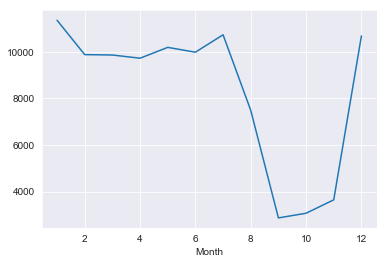

In [31]:
# Could be any column
byMonth['twp'].plot()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


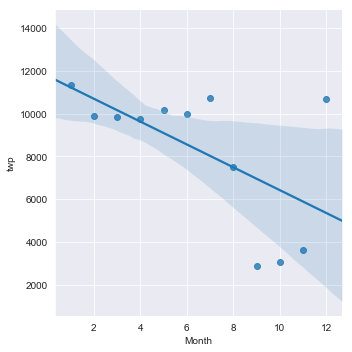

In [32]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [34]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

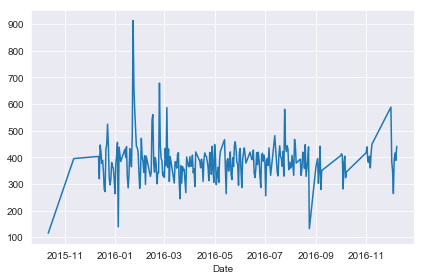

In [35]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

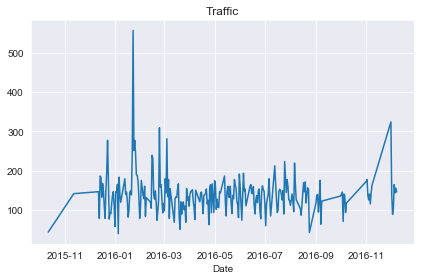

In [36]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

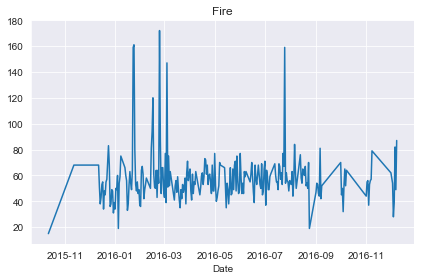

In [37]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

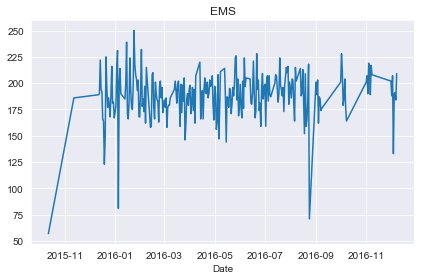

In [38]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [39]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,283,220,211,184,214,207,379,551,751,699,...,880,862,944,947,785,659,593,489,477,419
Mon,279,228,215,191,205,265,377,637,766,793,...,859,952,1014,1031,898,818,670,536,492,328
Sat,355,266,221,244,229,249,305,482,584,683,...,812,824,874,875,823,712,619,551,492,396
Sun,353,296,274,227,199,221,335,527,517,665,...,774,756,764,766,715,628,561,524,445,359
Thu,296,231,233,183,188,204,360,564,771,795,...,893,975,954,985,848,737,716,648,470,411


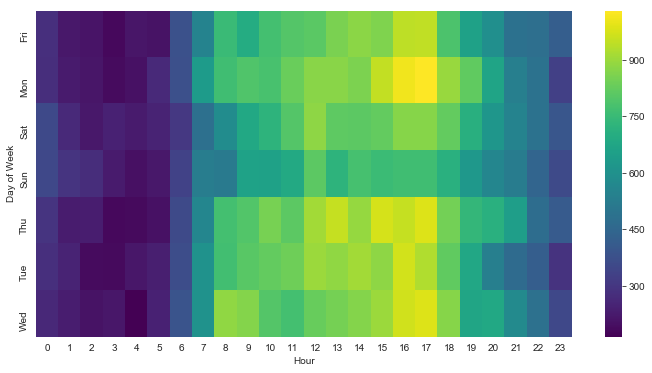

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

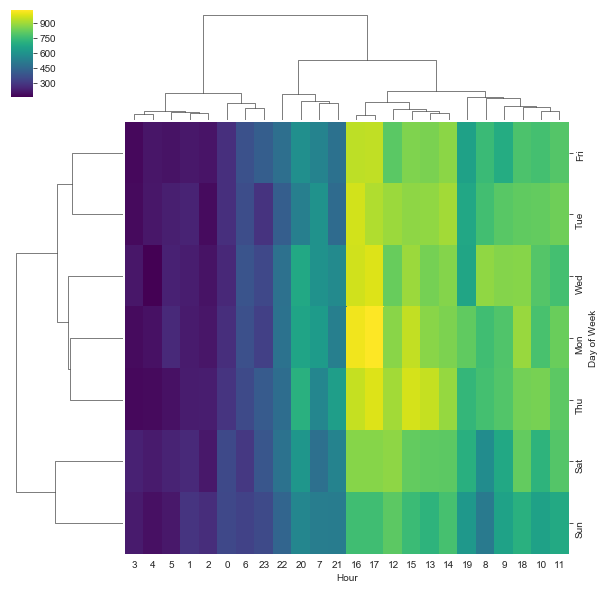

In [41]:
sns.clustermap(dayHour,cmap='viridis')

In [42]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,1995,1138,1359,1956,1622,1100,1907,779,380,323,381,1053
Mon,1364,1966,1463,1217,1481,1617,1381,1486,357,521,417,1650
Sat,1965,1497,980,1412,1467,1063,1373,1188,396,751,404,1328
Sun,1637,1272,1247,989,1822,1025,1421,1133,302,413,360,1171
Thu,1610,1177,1494,1495,1197,1568,1646,729,715,404,780,2180


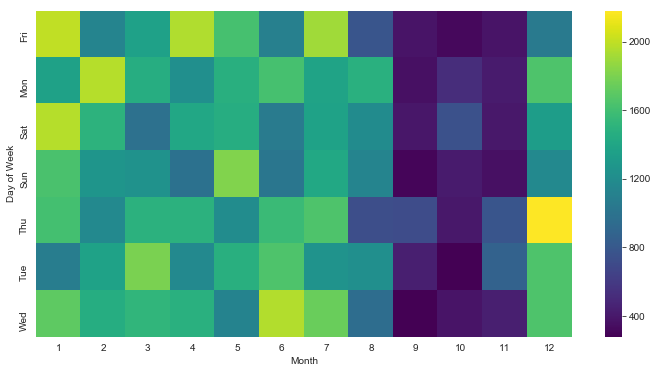

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

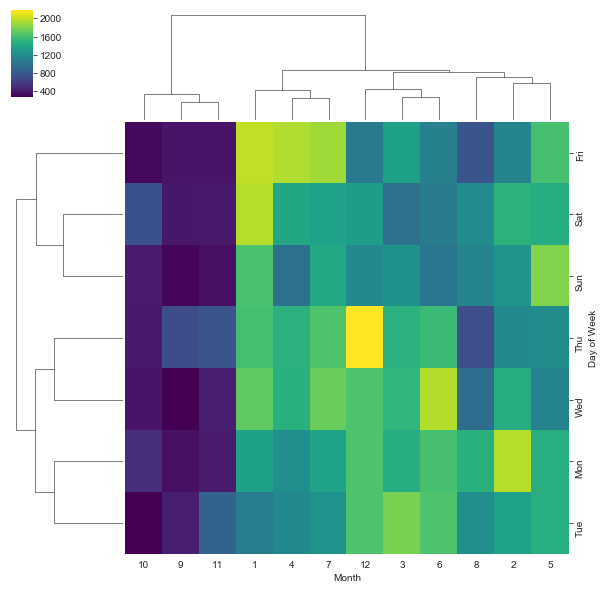

In [44]:
sns.clustermap(dayMonth,cmap='viridis')